In [1]:
import celltypist

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc

import gseapy as gp

import matplotlib.pyplot as plt
import seaborn as sns

import os
from tqdm import tqdm

# load data

In [3]:
adata = sc.read_h5ad("/nfs/public/cell_gpt_data/dataHub/generated_cells/Heart_aging/merged.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 31200 × 2000
    obs: 'cell_type', 'age', 'gender', 'age_bin_GTEx', 'celltype_age_bin', 'GTEx Heart 20-29 vs 30-39 Down', 'GTEx Heart 20-29 vs 40-49 Down', 'GTEx Heart 20-29 vs 50-59 Down', 'GTEx Heart 20-29 vs 60-69 Down', 'GTEx Heart 20-29 vs 70-79 Down', 'Unclear_Induces', 'Unclear_Inhibits', 'Unclear_Unclear', 'Stress-induced_Induces', 'Stress-induced_Inhibits', 'Stress-induced_Unclear', 'Oncogene-induced_Induces', 'Oncogene-induced_Inhibits', 'Oncogene-induced_Unclear', 'Replicative_Induces', 'Replicative_Inhibits', 'Replicative_Unclear', 'Age_bin'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'MI_age', 'MI_age_Cardiomyocyte cell', 'MI_age_Smooth muscle cell', 'MI_age_Pericyte', 'MI_age_Vascular endothelial cell', 'MI_age_Lymphatic endothelial cell', 'MI_age_Neuron', 'MI_age_Fibroblast', 'MI_age_Macrophage', 'MI_age_T cell', 'MI_age_B cell', 'MI_age_Adipocyte', 'MI_age_Monocyte'
    uns: 'Age_bin_colors', 'age_colors',

In [26]:
pd.crosstab(adata.obs.age, adata.obs.cell_type)

cell_type  Cardiomyocyte cell  Smooth muscle cell  Pericyte  \
age                                                           
20 year                   200                 200       200   
25 year                   200                 200       200   
30 year                   200                 200       200   
35 year                   200                 200       200   
40 year                   200                 200       200   
45 year                   200                 200       200   
50 year                   200                 200       200   
55 year                   200                 200       200   
60 year                   200                 200       200   
65 year                   200                 200       200   
70 year                   200                 200       200   
75 year                   200                 200       200   
80 year                   200                 200       200   

cell_type  Vascular endothelial cell  Lymphatic endothelial cell  Neuron  \
age                                                                        
20 year                          200                         200     200   
25 year                          200                         200     200   
30 year                          200                         200     200   
35 year                          200                         200     200   
40 year                          200                         200     200   
45 year                          200                         200     200   
50 year                          200                         200     200   
55 year                          200                         200     200   
60 year                          200                         200     200   
65 year                          200                         200     200   
70 year                          200                         200     200   
75 year                          200                         200     200   
80 year                          200                         200     200   

cell_type  Fibroblast  Macrophage  Monocyte  T cell  B cell  Adipocyte  
age                                                                     
20 year           200         200       200     200     200        200  
25 year           200         200       200     200     200        200  
30 year           200         200       200     200     200        200  
35 year           200         200       200     200     200        200  
40 year           200         200       200     200     200        200  
45 year           200         200       200     200     200        200  
50 year           200         200       200     200     200        200  
55 year           200         200       200     200     200        200  
60 year           200         200       200     200     200        200  
65 year           200         200       200     200     200        200  
70 year           200         200       200     200     200        200  
75 year           200         200       200     200     200        200  
80 year           200         200       200     200     200        200

In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=15)

/data/chenyx/anaconda3/envs/PICASSO/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/chenyx/anaconda3/envs/PICASSO/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/chenyx/anaconda3/envs/PICASSO/lib/python3.8/site-packages/umap/d

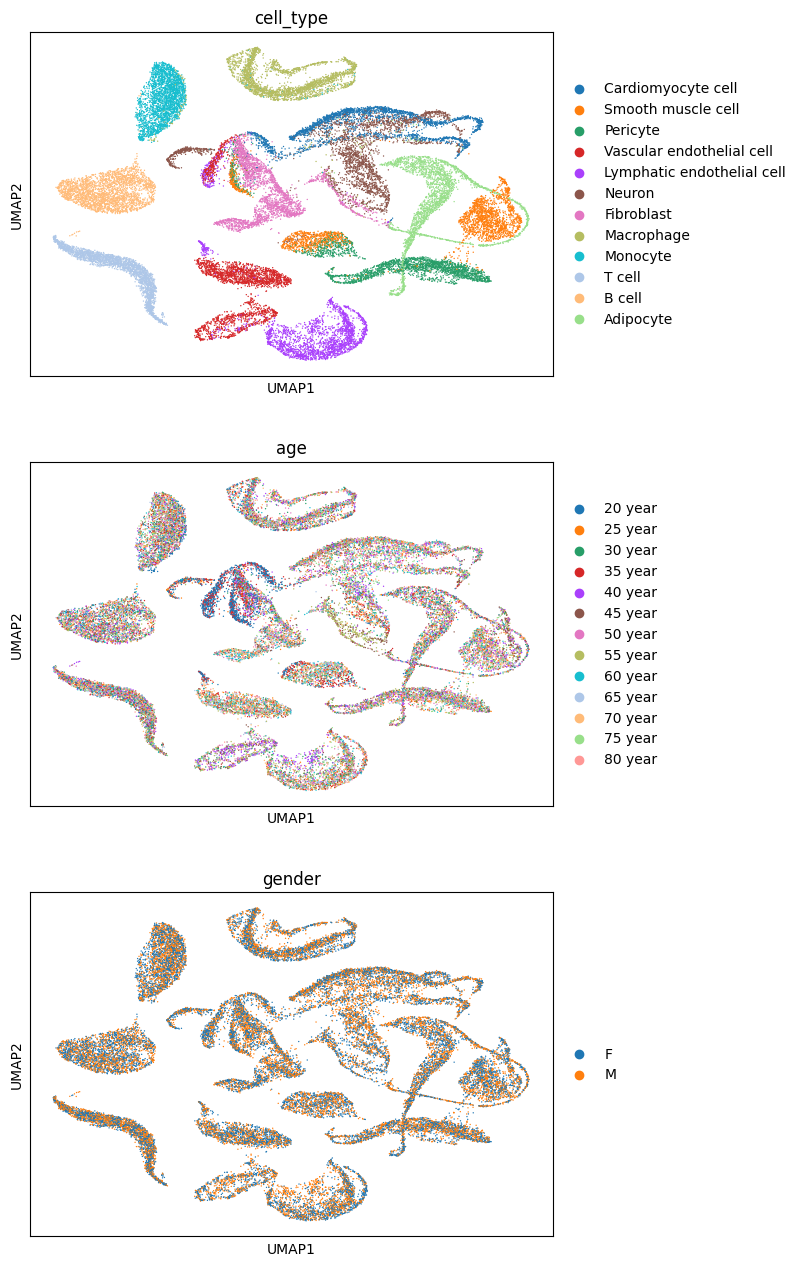

In [5]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type','age', 'gender'],ncols=1)

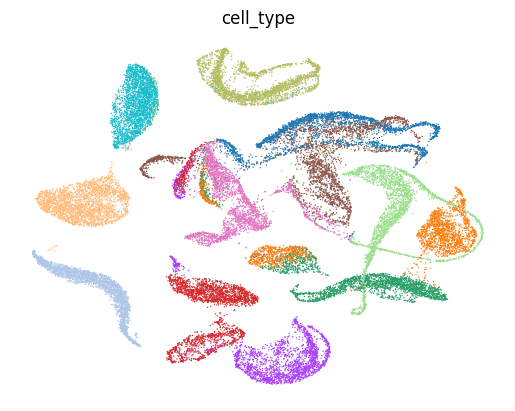

In [6]:
sc.pl.umap(adata, color=['cell_type'],ncols=1, frameon=False, legend_loc=None, save="cell_type.pdf")

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 38 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'space', 't', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 23, 36, 37, 38, 41, 47, 48, 49, 51, 54, 55, 57, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92, 3228]
Closed glyph list over 'GSUB': 38 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'space', 't', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 23, 36, 37, 38, 41, 47, 48, 49, 51, 5

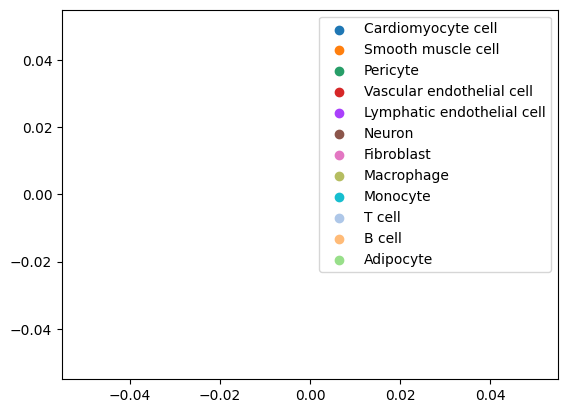

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.scatter([], [])

colors = adata.uns['cell_type_colors']
labels = adata.obs.cell_type.cat.categories

# 根据你的颜色和标签创建图例
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, label=label)

plt.legend()
plt.savefig("figures/Fig4c_cell_type_Legend_only.pdf")  # 导出为PDF
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 7 glyphs before
Glyph names: ['.notdef', '.null', 'a', 'e', 'g', 'nonmarkingreturn', 'space']
Glyph IDs:   [0, 1, 2, 3, 68, 72, 74]
Closed glyph list over 'GSUB': 7 glyphs after
Glyph names: ['.notdef', '.null', 'a', 'e', 'g', 'nonmarkingreturn', 'space']
Glyph IDs:   [0, 1, 2, 3, 68, 72, 74]
Closing glyph list over 'MATH': 7 glyphs before
Glyph names: ['.notdef', '.null', 'a', 'e', 'g', 'nonmarkingreturn', 'space']
Glyph IDs:   [0, 1, 2, 3, 68, 72, 74]
Closed glyph list over 'MATH': 7 glyphs after
Glyph names: ['.notdef', '.null', 'a', 'e', 'g', 'nonmarkingreturn', 'space']
Glyph IDs:   [0, 1, 2, 3, 68, 72, 74]
Closing glyph list over 'glyf': 7 glyphs before
Glyph names: ['.notdef', '.null', 'a', 'e', 'g', 'nonmarkingreturn', 'space']
Glyph IDs:   [0, 1, 2, 3, 68, 72, 74]
Closed glyph list o

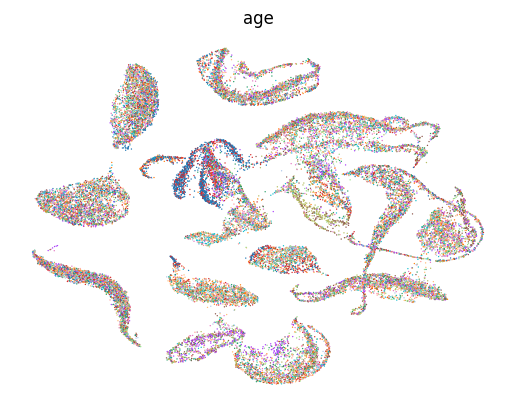

In [9]:
sc.pl.umap(adata, color=['age'],ncols=1, frameon=False, legend_loc=None, save="age.pdf")

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 18 glyphs before
Glyph names: ['.notdef', '.null', 'a', 'e', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'period', 'r', 'seven', 'six', 'space', 'three', 'two', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 22, 23, 24, 25, 26, 27, 68, 72, 85, 92, 3228]
Closed glyph list over 'GSUB': 18 glyphs after
Glyph names: ['.notdef', '.null', 'a', 'e', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'period', 'r', 'seven', 'six', 'space', 'three', 'two', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 22, 23, 24, 25, 26, 27, 68, 72, 85, 92, 3228]
Closing glyph list over 'MATH': 18 glyphs before
Glyph names: ['.notdef', '.null', 'a', 'e', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'period', 'r', 'seven', 'six', 'space', 'three', 'two', 'y', 'zero']
Glyph IDs:   [0, 1, 2

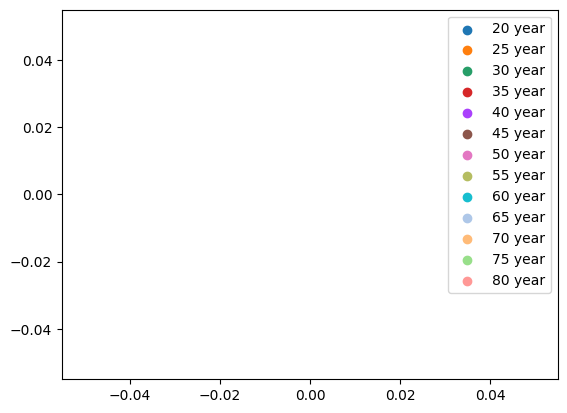

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.scatter([], [])

colors = adata.uns['age_colors']
labels = adata.obs.age.cat.categories

# 根据你的颜色和标签创建图例
for color, label in zip(colors, labels):
    plt.scatter([], [], c=color, label=label)

plt.legend()
plt.savefig("figures/Fig4c_age_Legend_only.pdf")  # 导出为PDF
plt.show()

# 0. validation

## 0.1 validation with celltypist

In [12]:
# ## renormalize
adata_anno2 = adata.copy()
adata_anno2.X = np.expm1(adata_anno2.X)
sc.pp.normalize_total(adata_anno2, target_sum=1e4)
sc.pp.log1p(adata_anno2)

In [13]:
adata.uns['renormalized'] = adata_anno2.X

In [14]:
predictions = celltypist.annotate(adata_anno2, model = './Healthy_Adult_Heart.pkl', majority_voting = True,)

🔬 Input data has 31200 cells and 2000 genes
🔗 Matching reference genes in the model
🧬 1312 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [15]:
adata_anno2.obs['celltypist_prediction'] = predictions.predicted_labels['predicted_labels']

In [16]:
pd.crosstab(adata_anno2.obs['celltypist_prediction'],adata_anno2.obs['cell_type'])

cell_type              Cardiomyocyte cell  Smooth muscle cell  Pericyte  \
celltypist_prediction                                                     
Adip1                                   0                   0         0   
Adip2                                 141                   9        57   
Adip4                                   0                   0         0   
B                                       0                   0         0   
CD14+Mo                                 0                   0         0   
CD16+Mo                                 0                   0         0   
CD4+T_Th2                               0                   0         0   
CD4+T_act                               0                   0         0   
CD4+T_naive                             0                   0         0   
CD8+T_cytox                             0                   0         0   
CD8+T_em                                0                   0         0   
CD8+T_te                                0                   0         0   
CD8+T_trans                             0                   0         0   
DC                                      0                   0         0   
EC10_CMC-like                           8                   1         1   
EC1_cap                                 0                   0         0   
EC2_cap                                 0                   0         0   
EC3_cap                                 2                   8         7   
EC4_immune                              0                   1         0   
EC5_art                                 0                   0         0   
EC6_ven                                 0                   0         0   
EC7_endocardial                         0                   0         0   
EC8_ln                                  0                   0         0   
FB1                                     0                   0         0   
FB2                                     0                   0         0   
FB3                                     0                   0         0   
FB4_activated                           1                   0         0   
FB5                                     0                   0         0   
FB6                                    20                   7        71   
LYVE1+IGF1+MP                           0                   0         0   
LYVE1+MP_cycling                        0                   0         1   
LYVE1+TIMD4+MP                          0                   0         0   
MAIT-like                               0                   0         0   
MoMP                                    1                   0         2   
NC1_glial                               0                   0         0   
NC2_glial_NGF+                         35                  16        16   
NK_CD16hi                               0                   0         0   
NK_CD56hi                               0                   0         0   
PC1_vent                                0                  23      1219   
PC2_atria                               0                   0        23   
PC3_str                                47                 796       645   
PC4_CMC-like                            0                  45       551   
Purkinje_cell                           0                   0         0   
SMC1_basic                              0                1249         1   
SMC2_art                               17                 438         1   
aCM1                                    1                   0         0   
aCM2                                   67                   0         0   
aCM3                                  230                   5         0   
aCM4                                   97                   0         1   
vCM1                                 1128                   1         0   
vCM2                                  596                   0         0   
vCM3_stressed            

In [17]:
np.unique(adata_anno2.obs['celltypist_prediction'])

array(['Adip1', 'Adip2', 'Adip4', 'B', 'CD14+Mo', 'CD16+Mo', 'CD4+T_Th2',
       'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te',
       'CD8+T_trans', 'DC', 'EC10_CMC-like', 'EC1_cap', 'EC2_cap',
       'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_endocardial',
       'EC8_ln', 'FB1', 'FB2', 'FB3', 'FB4_activated', 'FB5', 'FB6',
       'LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP', 'MAIT-like',
       'MoMP', 'NC1_glial', 'NC2_glial_NGF+', 'NK_CD16hi', 'NK_CD56hi',
       'PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like',
       'Purkinje_cell', 'SMC1_basic', 'SMC2_art', 'aCM1', 'aCM2', 'aCM3',
       'aCM4', 'vCM1', 'vCM2', 'vCM3_stressed', 'vCM4', 'vCM5'],
      dtype=object)

In [18]:
mappings = {
    "Adipocyte": ['Adip1', 'Adip2', 'Adip4'], 
    "B cell":['B'],
    "Monocyte":['CD14+Mo', 'CD16+Mo', 'MoMP'],
    "T cell":['CD4+T_Th2', 'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans', 'MAIT-like'],
    "Dendritic cell":['DC'],
    "Vascular EC":['EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_endocardial'],
    "Lymphatic EC":['EC8_ln'],
    "Fibroblast":['FB1', 'FB2', 'FB3', 'FB4_activated', 'FB5', 'FB6'],
    "Macrophage":['LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP'],
    "Neuroglial":['NC1_glial', 'NC2_glial_NGF+'],
    "NK cell":['NK_CD16hi', 'NK_CD56hi'],
    "Pericyte":['PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like'],
    "Smooth muscle cell":['SMC1_basic', 'SMC2_art'],
    "Cardiomyocyte cell":['Purkinje_cell','aCM1', 'aCM2', 'aCM3', 'aCM4', 'vCM1', 'vCM2', 'vCM3_stressed', 'vCM4', 'vCM5']
}

In [19]:
adata_anno2.obs['celltypist_prediction_coarse'] = ""
for key,value in mappings.items():
    adata_anno2.obs.celltypist_prediction_coarse[adata_anno2.obs.celltypist_prediction.isin(value)] = key

/tmp/ipykernel_2771202/3039487661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_anno2.obs.celltypist_prediction_coarse[adata_anno2.obs.celltypist_prediction.isin(value)] = key
/tmp/ipykernel_2771202/3039487661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_anno2.obs.celltypist_prediction_coarse[adata_anno2.obs.celltypist_prediction.isin(value)] = key
/tmp/ipykernel_2771202/3039487661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [20]:
adata_anno2.obs['celltypist_prediction_coarse'] = pd.Categorical(adata_anno2.obs['celltypist_prediction_coarse'], 
['Cardiomyocyte cell',
'Smooth muscle cell',
 'Pericyte',
 'Vascular EC',
  'Lymphatic EC',
  'Neuroglial',
 'Fibroblast',
 'Macrophage',
 'Dendritic cell',
 'Monocyte',
 'T cell',
 'B cell',
 'NK cell',
 'Adipocyte'
])
adata_anno2.obs['cell_type'] = pd.Categorical(adata_anno2.obs['cell_type'], ['Cardiomyocyte cell',
 'Smooth muscle cell',
 'Pericyte',
 'Vascular endothelial cell',
 'Lymphatic endothelial cell',
 'Neuron',
 'Fibroblast',
 'Macrophage',
  'Monocyte',
 'T cell',
 'B cell',
 'Adipocyte'])

In [21]:
cm = pd.crosstab(adata_anno2.obs['cell_type'],adata_anno2.obs['celltypist_prediction_coarse'])
cm

celltypist_prediction_coarse  Cardiomyocyte cell  Smooth muscle cell  \
cell_type                                                              
Cardiomyocyte cell                          2328                  17   
Smooth muscle cell                             7                1687   
Pericyte                                       5                   2   
Vascular endothelial cell                     39                   1   
Lymphatic endothelial cell                    19                   0   
Neuron                                       372                   0   
Fibroblast                                   135                   5   
Macrophage                                    20                   0   
Monocyte                                       6                   0   
T cell                                         0                   0   
B cell                                         3                   0   
Adipocyte                                     10                   0   

celltypist_prediction_coarse  Pericyte  Vascular EC  Lymphatic EC  Neuroglial  \
cell_type                                                                       
Cardiomyocyte cell                  47           10             0          35   
Smooth muscle cell                 864           10             0          16   
Pericyte                          2438            8             0          16   
Vascular endothelial cell           91         2384             0           1   
Lymphatic endothelial cell          83          232          2129           2   
Neuron                             174           21             0        1824   
Fibroblast                         766          233             0          42   
Macrophage                           4            3             0          28   
Monocyte                             2            0             0           0   
T cell                               0            0             0           0   
B cell                               0           92             0           0   
Adipocyte                            0            0             0          23   

celltypist_prediction_coarse  Fibroblast  Macrophage  Dendritic cell  \
cell_type                                                              
Cardiomyocyte cell                    21           0               0   
Smooth muscle cell                     7           0               0   
Pericyte                              71           1               0   
Vascular endothelial cell              8           0               0   
Lymphatic endothelial cell            16           0               0   
Neuron                                49           0               0   
Fibroblast                          1249         115               1   
Macrophage                            17        2300               0   
Monocyte                               2        2015               2   
T cell                                 0           0               0   
B cell                                 1         189              16   
Adipocyte                            963           0               0   

celltypist_prediction_coarse  Monocyte  T cell  B cell  NK cell  Adipocyte  
cell_type                                                                   
Cardiomyocyte cell                   1       0       0        0        141  
Smooth muscle cell                   0       0       0        0          9  
Pericyte                             2       0       0        0         57  
Vascular endothelial cell            5       0       0        0         71  
Lymphatic endothelial cell           1       0       0        0        118  
Neuron                              10       0       0        0        150  
Fibroblast                          11       0       0        0         43  
Macrophage                          17       0       0        0        211  
Monocyte                           566       0       0        0          7  


maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 43 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'K', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 23, 25, 27, 36, 37, 38, 39, 40, 41, 46, 47, 48, 49, 51, 54, 55, 57, 66, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'GSUB': 43 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'K', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore'

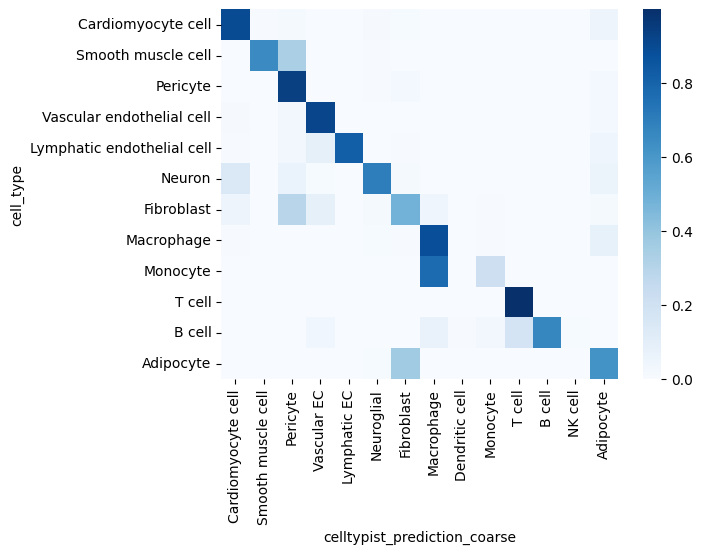

In [23]:
sns.heatmap(cm/2600, cmap="Blues")
plt.savefig("figures/CM_celltypist.pdf")

## 0.2 validation with markers

In [24]:
adata.obs['cell_type'] = pd.Categorical(adata.obs.cell_type, ['Cardiomyocyte cell',
 'Smooth muscle cell',
 'Pericyte',
 'Vascular endothelial cell',
 'Lymphatic endothelial cell',
 'Neuron',
 'Fibroblast',
 'Macrophage',
 'Monocyte',
 'T cell',
 'B cell',
 'Adipocyte'])

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 62 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 91, 92]
Closed glyph list over 'GSUB': 67 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H

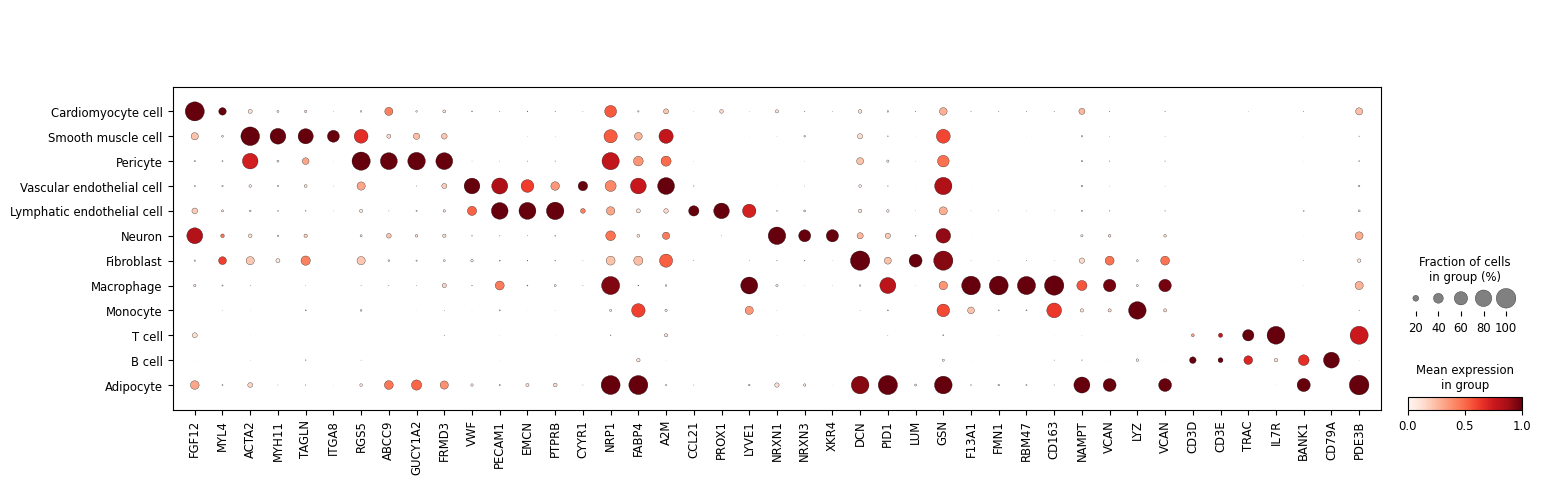

In [27]:
marker_gene_level1 = ["FGF12", "MYL4", #CM
"ACTA2","MYH11","TAGLN","ITGA8",#SMC  
"RGS5","ABCC9","GUCY1A2","FRMD3",#Peri  
"VWF", "PECAM1", "EMCN", "PTPRB",#EC
"CYYR1","NRP1","FABP4","A2M",#Vascular
"CCL21","PROX1","LYVE1",#Lymphatic 
"NRXN1","NRXN3","XKR4", #Neuron
"DCN", "PID1", "LUM", 'GSN', #FB
"F13A1","FMN1","RBM47","CD163",#MP
"NAMPT","VCAN","LYZ","VCAN",#Mo
"CD3D","CD3E","TRAC","IL7R",#T
"BANK1","CD79A", #B
"PDE3B" # adipocyte
]
sc.pl.dotplot(adata, var_names=marker_gene_level1, groupby="cell_type",use_raw=False,standard_scale="var", save="Maker_genes.pdf")

# 1. Check GTEx Aging signature

In [90]:
df_GTEx = pd.read_table("GTEx_Aging_Signatures_2021.txt", header=None)

In [91]:
df_GTEx.loc[[("Heart" in x)for x in df_GTEx[0]],0]

58       GTEx Heart 20-29 vs 30-39 Up
59     GTEx Heart 20-29 vs 30-39 Down
132      GTEx Heart 20-29 vs 70-79 Up
133    GTEx Heart 20-29 vs 70-79 Down
134      GTEx Heart 20-29 vs 60-69 Up
135    GTEx Heart 20-29 vs 60-69 Down
214      GTEx Heart 20-29 vs 40-49 Up
215    GTEx Heart 20-29 vs 40-49 Down
222      GTEx Heart 20-29 vs 50-59 Up
223    GTEx Heart 20-29 vs 50-59 Down
Name: 0, dtype: object

In [92]:
gene_dict = {}
for idx in [59,215,223,135,133]:
    gene_list = df_GTEx.iloc[idx,2:251]
    gene_dict[df_GTEx.iloc[idx,0]] = np.array(gene_list[[(x in adata.var.index) for x in gene_list]])
gene_dict

{'GTEx Heart 20-29 vs 30-39 Down': array(['IL1R2', 'KRT7', 'EREG', 'ETNPPL', 'MARCO', 'MT1A', 'SERPINE1',
        'SPOCK3', 'CALN1', 'SDS', 'SLC11A1', 'PRG4', 'HAMP', 'HMOX1',
        'PDK4', 'CGA', 'CCL22', 'TNFRSF12A', 'CCL20', 'SIGLEC10', 'FN1',
        'LIF', 'FPR1', 'AREG', 'ANKRD1', 'ADAM12', 'ADAM19', 'MAP1B',
        'ANGPTL4', 'PLIN2', 'SAA1', 'NAMPT', 'MFSD2A', 'CA10', 'CD163',
        'CD300E', 'SCG2', 'CD177', 'TNC', 'GRIP1', 'TNR', 'POSTN', 'HOPX',
        'MAG', 'FCMR', 'CLEC5A', 'CMTM5', 'ELF3', 'CHI3L1', 'MOBP',
        'TREM1', 'DCC', 'RRM2', 'DNAJA4', 'PTX3', 'LUZP2', 'FHL1', 'THBS1',
        'IL1RL1'], dtype=object),
 'GTEx Heart 20-29 vs 40-49 Down': array(['BTBD11', 'EREG', 'ETNPPL', 'CPVL', 'IDO1', 'SPOCK3', 'CFTR',
        'LPAR5', 'STMN2', 'HMOX1', 'CGA', 'MIR646HG', 'CCL20', 'LIF',
        'GALNTL6', 'CTLA4', 'CTSC', 'B3GNT7', 'KIF26B', 'CD5L', 'NAMPT',
        'CCL18', 'DIO2', 'TNC', 'SYT1', 'HOPX', 'FCMR', 'LPL', 'BMP5',
        'ELF3', 'PDE3A', 'PHACTR1', 'D

In [93]:
gene_dict.keys()

dict_keys(['GTEx Heart 20-29 vs 30-39 Down', 'GTEx Heart 20-29 vs 40-49 Down', 'GTEx Heart 20-29 vs 50-59 Down', 'GTEx Heart 20-29 vs 60-69 Down', 'GTEx Heart 20-29 vs 70-79 Down'])

## 1.1 Overall score

In [32]:
adata.obs['age_bin_GTEx'] = ""
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["20 year", "25 year"])] = "20-29"
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["30 year", "35 year"])] = "30-39"
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["40 year", "45 year"])] = "40-49"
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["50 year", "55 year"])] = "50-59"
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["60 year", "65 year"])] = "60-69"
adata.obs['age_bin_GTEx'][adata.obs.age.isin(["70 year", "75 year", "80 year"])] = "70-79"

/tmp/ipykernel_2771202/265948943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['age_bin_GTEx'][adata.obs.age.isin(["20 year", "25 year"])] = "20-29"
/tmp/ipykernel_2771202/265948943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['age_bin_GTEx'][adata.obs.age.isin(["30 year", "35 year"])] = "30-39"
/tmp/ipykernel_2771202/265948943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['age_bin_GTEx'

In [33]:
adata.obs['celltype_age_bin'] = adata.obs['cell_type'].astype(str) + "_" + adata.obs['age_bin_GTEx'].astype(str)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 43 glyphs before
Glyph names: ['.notdef', '.null', 'D', 'E', 'F', 'G', 'H', 'M', 'T', 'a', 'c', 'e', 'eight', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'x', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 39, 40, 41, 42, 43, 48, 55, 68, 70, 72, 73, 74, 76, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91]
Closed glyph list over 'GSUB': 48 glyphs after
Glyph names: ['.notdef', '.null', 'D', 'E', 'F', 'G', 'H', 'M', 'T', 'a', 'c', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'g', 'hyphen', 'i', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent'

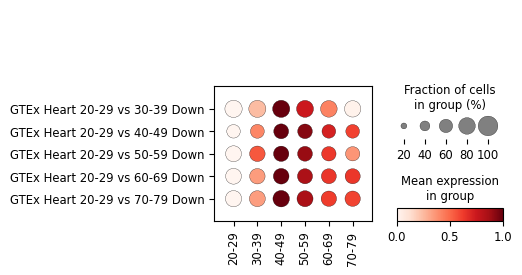

In [94]:
for key in gene_dict.keys():
    adata.obs[key] = adata.X[:,adata.var.index.isin(gene_dict[key])].sum(axis=1)
sc.pl.dotplot(adata, list(gene_dict.keys()), groupby="age_bin_GTEx", standard_scale="var",save="GTEx_aging_signature_all.pdf",swap_axes=True, dot_max=1)

## 1.2 cell-type-specific scores

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 56 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 51, 54, 55, 57, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92]
Closed glyph list over 'GSUB': 61 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'M', 'N', 'P', 'S', 'T', 'V', 'a', 'b', '

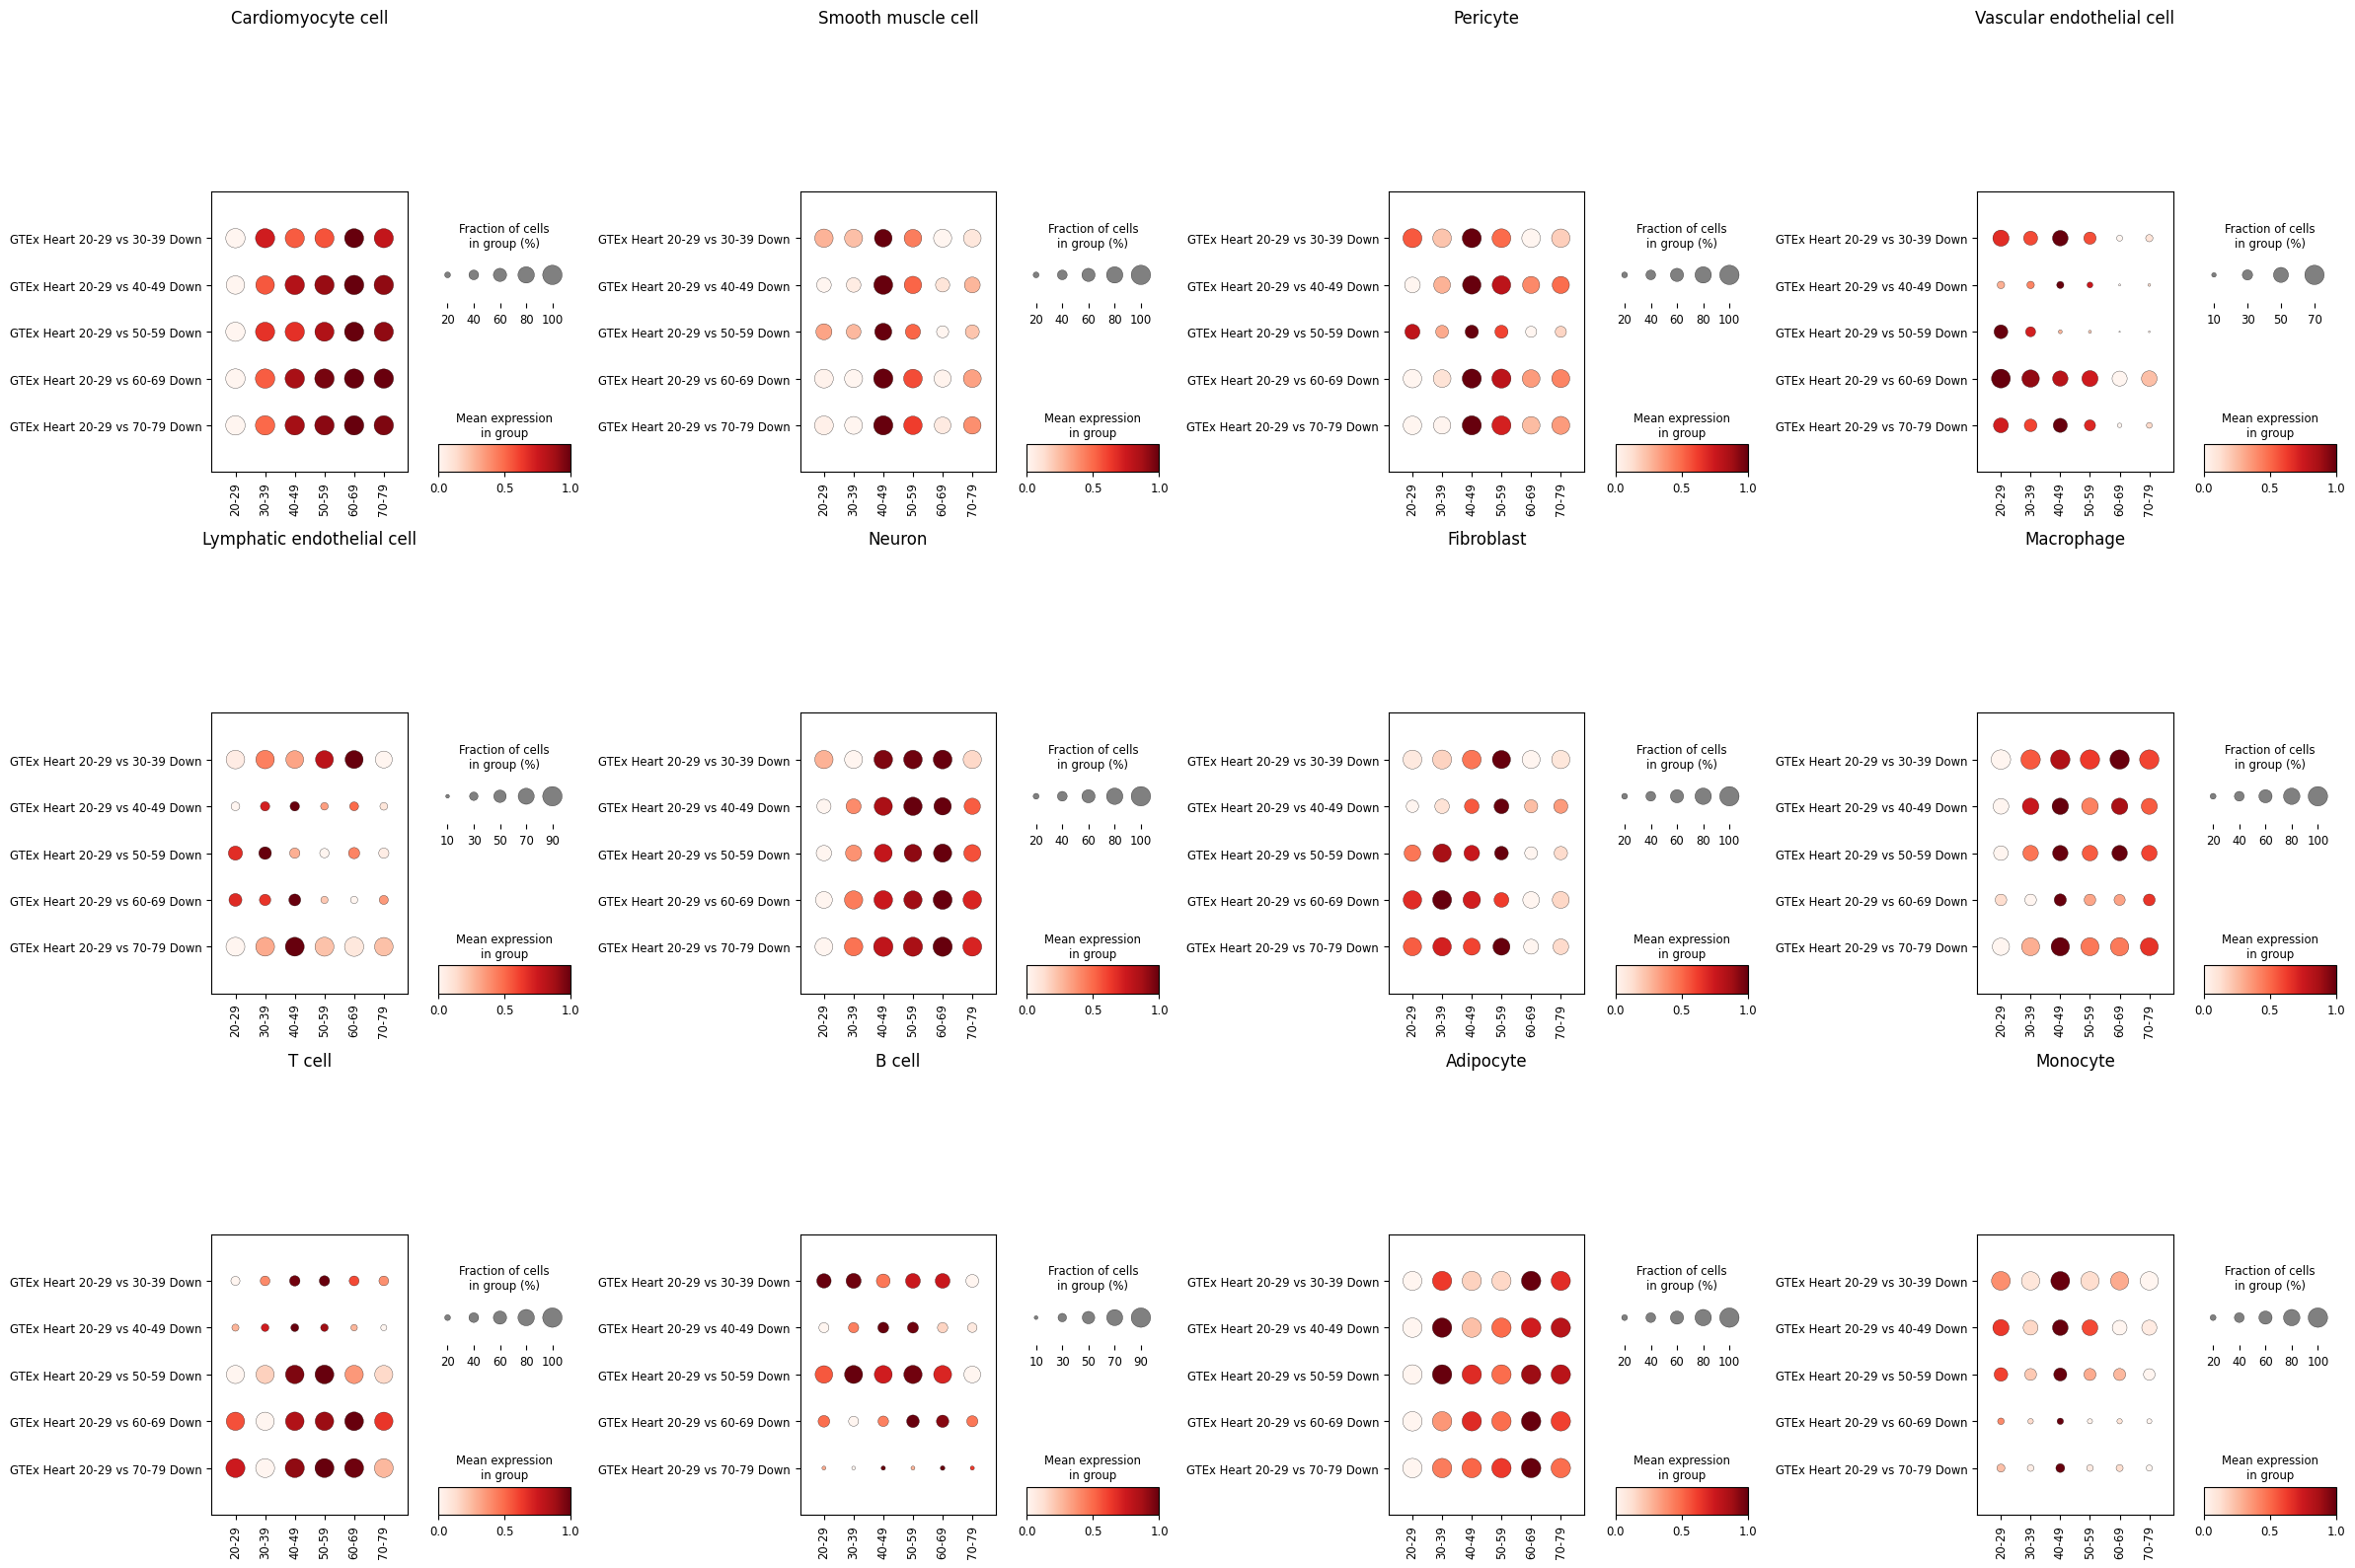

In [42]:
# in each cell type
fig, axs = plt.subplots(3,4, figsize=(24,16))
for i, ct in enumerate(adata.obs.cell_type.unique()):
    adata_ct = adata[adata.obs.cell_type==ct,:]
    sc.pl.dotplot(adata_ct, list(gene_dict.keys()), groupby="age_bin_GTEx", standard_scale="var",ax=axs[i//4,i%4], show=False, title=ct,swap_axes=True)
plt.tight_layout()
#plt.savefig("figures/GTEx_aging_signature_celltypes.pdf")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 47 glyphs before
Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'F', 'G', 'H', 'M', 'T', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 38, 39, 40, 41, 42, 43, 48, 55, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92]
Closed glyph list over 'GSUB': 52 glyphs after
Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'F', 'G', 'H', 'M', 'T', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'g', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o

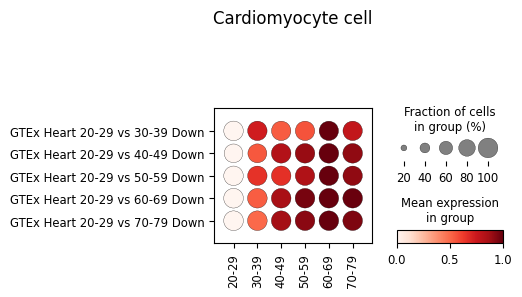

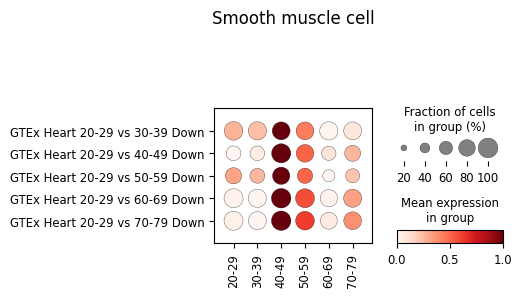

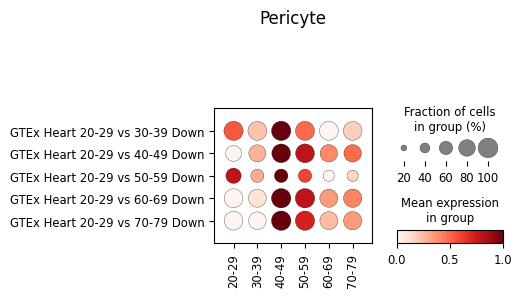

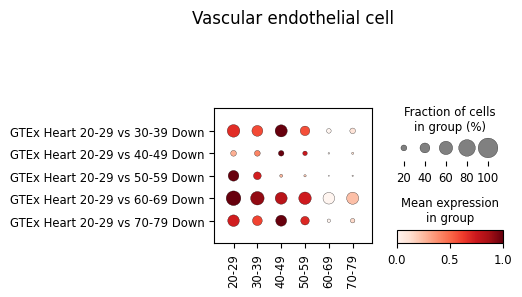

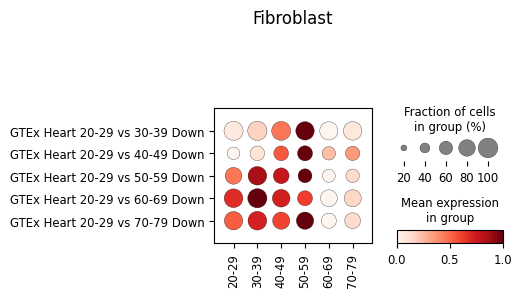

In [95]:
# in each cell type
for i, ct in enumerate(['Cardiomyocyte cell', 'Smooth muscle cell', 'Pericyte', 'Vascular endothelial cell','Fibroblast']):
    adata_ct = adata[adata.obs.cell_type==ct,:]
    sc.pl.dotplot(adata_ct, list(gene_dict.keys()), groupby="age_bin_GTEx", standard_scale="var", show=False, title=ct,swap_axes=True, dot_max=1)
    plt.tight_layout()
    plt.savefig(f"figures/GTEx_aging_signature_{ct}.pdf")

# 2. DEG analysis

## 2.1 calculate DEGs

In [60]:
adata.obs['Age_bin'] = "Teen"
adata.obs.Age_bin[adata.obs.age.isin(['40 year', '45 year', '50 year', '55 year'])] = "Middle"
adata.obs.Age_bin[adata.obs.age.isin(['60 year', '65 year', '70 year', '75 year','80 year'])] = "old"

/tmp/ipykernel_2771202/4250493681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.Age_bin[adata.obs.age.isin(['40 year', '45 year', '50 year', '55 year'])] = "Middle"
/tmp/ipykernel_2771202/4250493681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.Age_bin[adata.obs.age.isin(['60 year', '65 year', '70 year', '75 year','80 year'])] = "old"


... storing 'Age_bin' as categorical


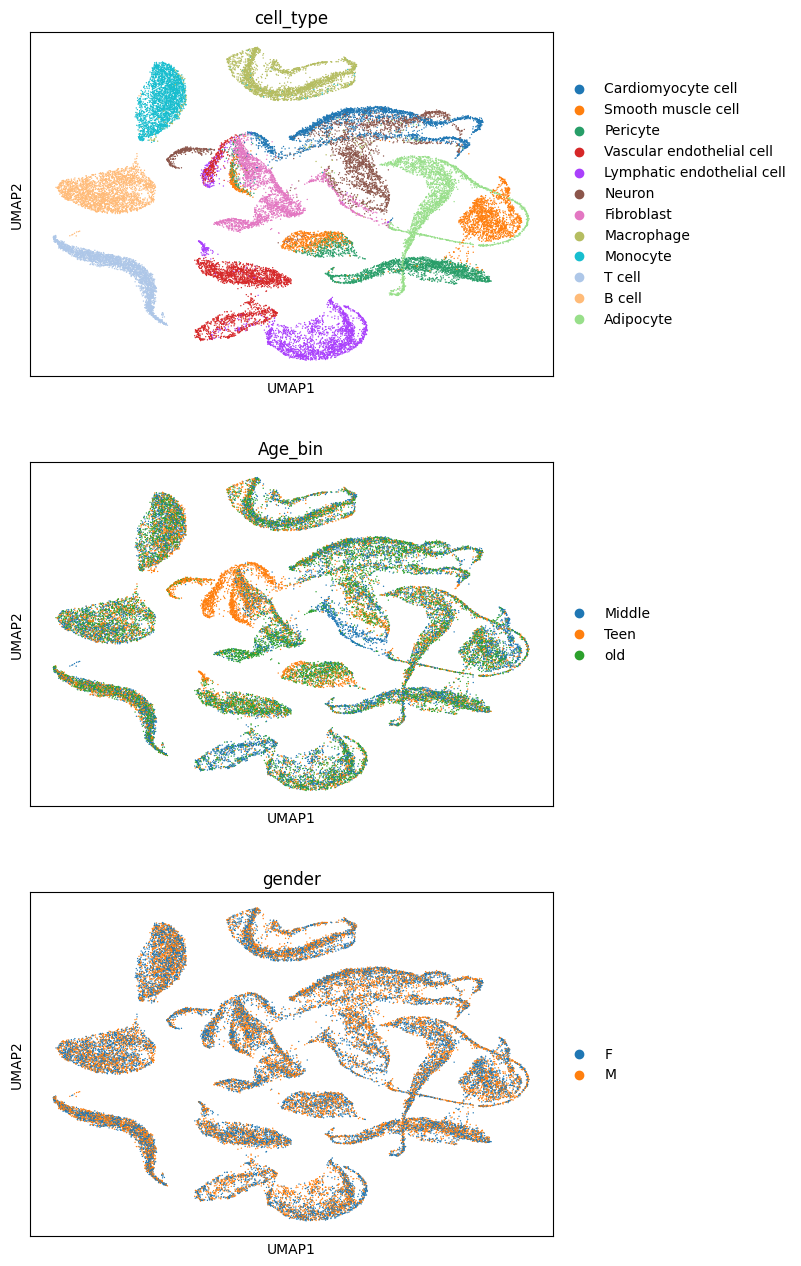

In [61]:
sc.pl.umap(adata, color=['cell_type','Age_bin', 'gender'],ncols=1)

In [62]:
for ct in tqdm(adata.obs.cell_type.unique()):
    adata_ct = adata[adata.obs.cell_type==ct,:]
    sc.tl.rank_genes_groups(adata_ct, groupby="Age_bin", method="wilcoxon")
    result = adata_ct.uns['rank_genes_groups']

    # 提取每个群组的差异基因信息并转换为 DataFrame
    groups = result['names'].dtype.names
    dfs = []

    for group in groups:
        df = pd.DataFrame({
            'gene': result['names'][group],
            'logfoldchanges': result['logfoldchanges'][group],
            'pvals': result['pvals'][group],
            'pvals_adj': result['pvals_adj'][group]
        })
        df['group'] = group
        dfs.append(df)

    # 合并所有群组的数据框
    rank_genes_df = pd.concat(dfs, ignore_index=True)

    # 打印前几行
    rank_genes_df_filtered = rank_genes_df.loc[(rank_genes_df.pvals_adj<0.05),:]
    rank_genes_df_filtered.to_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv")

100%|██████████| 12/12 [00:08<00:00,  1.43it/s]


## 2.2 Check DEG in selected cell types

### CM

In [14]:
ct = "Cardiomyocyte cell"
adata_ct = adata[adata.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [85]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [45]:
df_old

gene  logfoldchanges         pvals     pvals_adj group
4031   S100A10        0.066525  3.065754e-04  1.916097e-02   old
4024      C1QC        0.079357  9.179956e-05  7.343965e-03   old
4025    TYROBP        0.081117  1.139016e-04  8.761663e-03   old
4008    RNASE1        0.082190  4.404015e-09  9.786700e-07   old
4030     COTL1        0.083322  3.021631e-04  1.916097e-02   old
4015      CST3        0.083860  7.986167e-07  9.982709e-05   old
4002      FTH1        0.087563  1.122475e-17  7.483164e-15   old
4014    FCER1G        0.090192  3.730471e-07  4.973961e-05   old
4018    TMSB10        0.090552  2.522125e-06  2.654868e-04   old
4007       FTL        0.091036  5.834074e-10  1.458519e-07   old
4000       B2M        0.091676  9.779845e-31  1.955969e-27   old
4009    TMSB4X        0.092679  1.072361e-08  2.117160e-06   old
4017      CD74        0.092988  1.813572e-06  2.015080e-04   old
4016    LGALS1        0.099096  1.576402e-06  1.854591e-04   old
4019    S100A9        0.100460  3.023346e-06  3.023346e-04   old
4013      AIF1        0.102446  2.531468e-07  3.616383e-05   old
4006      CYBA        0.106276  3.500095e-10  1.000027e-07   old
4021     HSPB1        0.110370  7.030111e-06  6.391010e-04   old
4029  C1orf162        0.112902  2.816234e-04  1.877489e-02   old
4001    S100A6        0.115376  2.899981e-19  2.899981e-16   old
4003    S100A4        0.117745  5.849426e-16  2.924713e-13   old
4033      HCST        0.121766  5.954391e-04  3.502583e-02   old
4026      CD68        0.125839  1.273884e-04  9.436180e-03   old
4032     TIMP1        0.131662  3.336548e-04  2.022150e-02   old
4012    S100A8        0.138296  5.276531e-08  8.117740e-06   old
4004    MALAT1        0.154479  2.256011e-12  9.024046e-10   old
4023      SRGN        0.155342  7.885797e-05  6.571497e-03   old
4034  HSP90AA1        0.157323  6.994743e-04  3.996996e-02   old
4011      LST1        0.157366  4.109998e-08  6.849997e-06   old
4020      MT2A        0.161226  5.096957e-06  4.854245e-04   old
4005    IFITM3        0.171989  8.649045e-12  2.883015e-09   old
4027      CD52        0.200225  1.768204e-04  1.263003e-02   old
4010    IFITM2        0.237907  1.164438e-08  2.117160e-06   old
4022     IFI27        0.244852  2.119794e-05  1.843299e-03   old
4028    CORO1A        0.246660  2.210694e-04  1.524617e-02   old

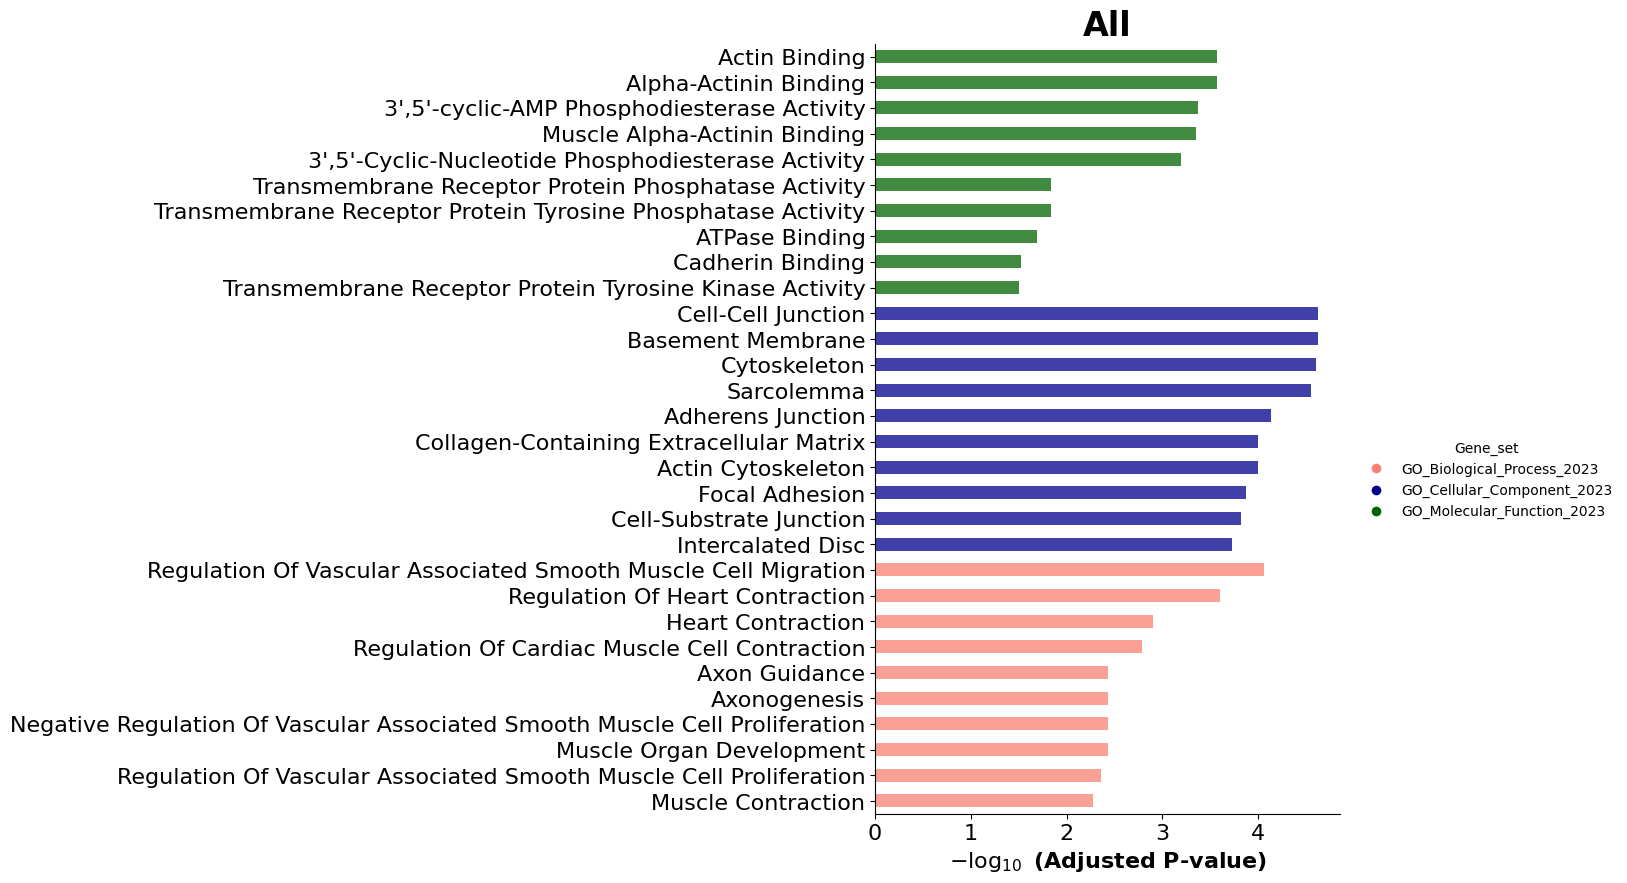

In [72]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023", 'GO_Cellular_Component_2023','GO_Molecular_Function_2023'],
                    outdir=None)
enr_GO.results.Term = enr_GO.results.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(6,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closed glyph list over 'GSUB': 18 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closing glyph list over 'glyf': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77,

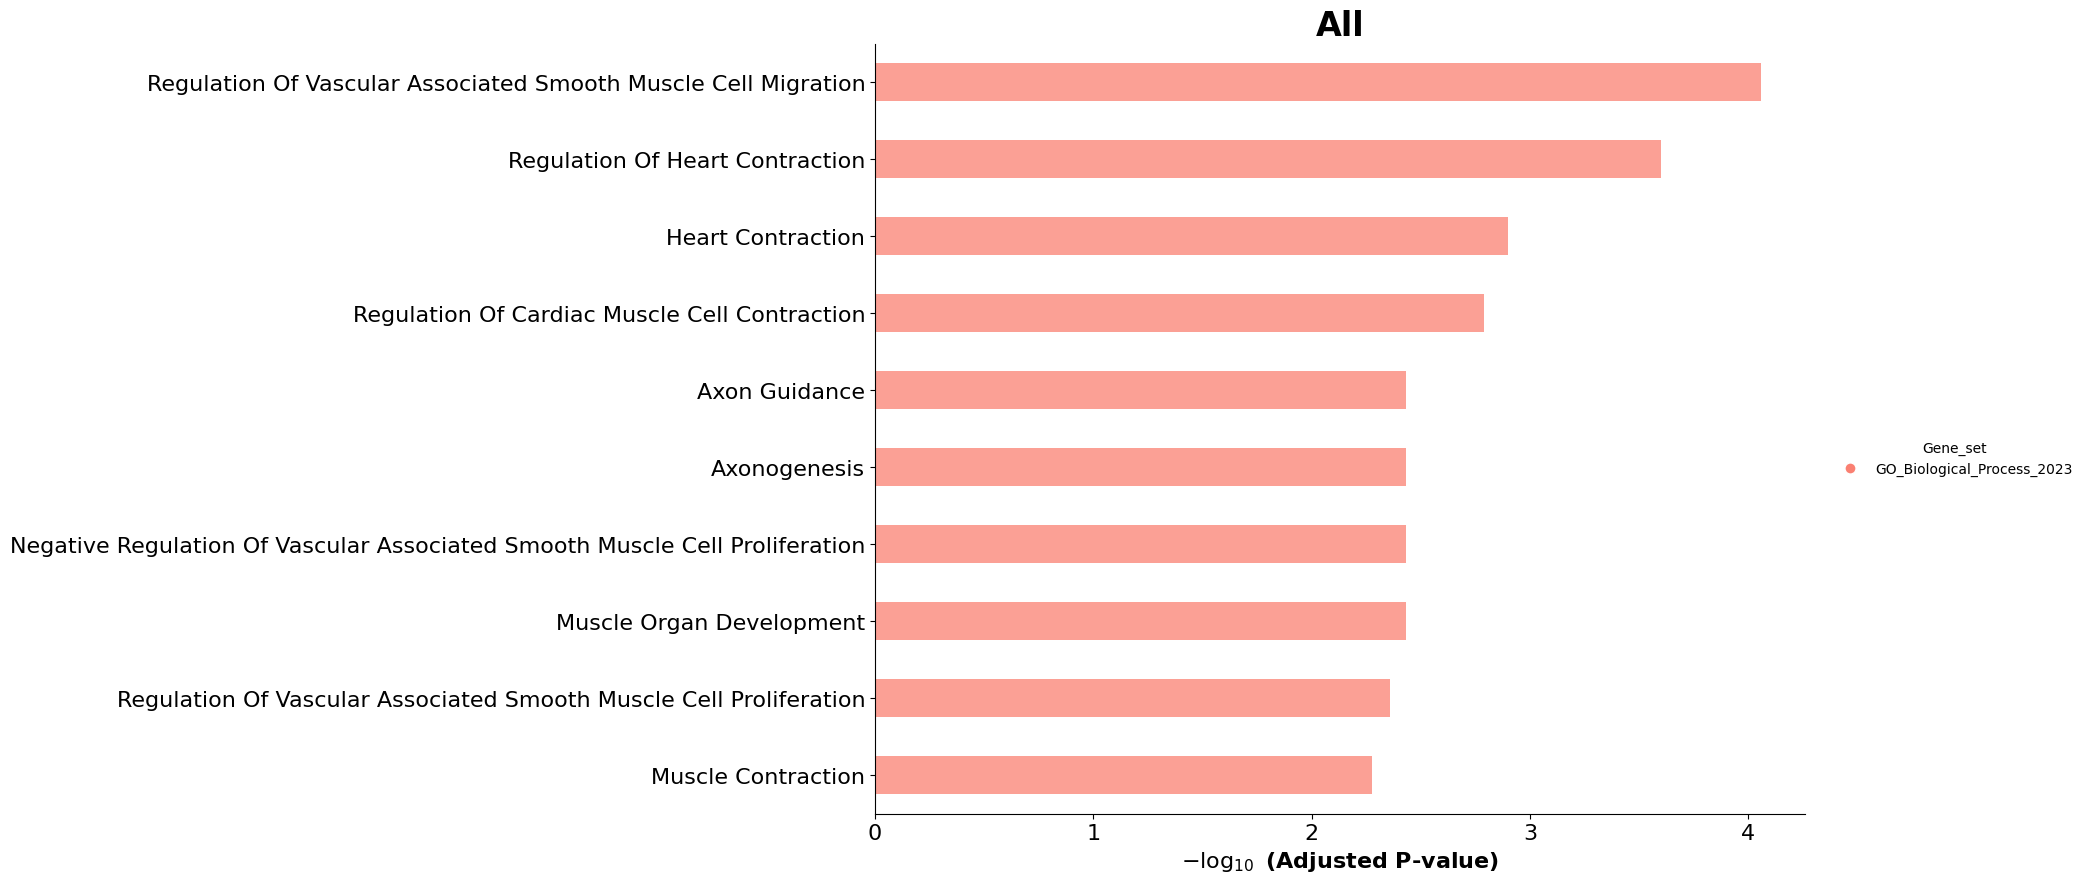

In [86]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023"],
                    outdir=None)
enr_GO.results.Term = enr_GO.results.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(12,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.savefig("figures/GOBP_CM.pdf")
plt.show()

### vEC

In [81]:
ct = 'Vascular endothelial cell'
adata_ct = adata[adata.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [101]:
ct = 'Vascular endothelial cell'
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [102]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [103]:
df_old

gene  logfoldchanges         pvals     pvals_adj group
5970   MT-ATP8      -26.680056  2.634291e-16  5.789651e-15   old
5950  MTRNR2L1      -26.552485  1.054103e-14  1.817419e-13   old
5889       PLN      -25.555138  9.153227e-09  9.292617e-08   old
5783       CFD      -24.451792  4.427089e-03  2.650952e-02   old
5779      ATF3      -24.402750  7.254836e-03  4.280139e-02   old
...        ...             ...           ...           ...   ...
4047   TSPAN13        1.016996  8.136278e-21  3.070293e-19   old
4037      SNCG        1.031338  2.631860e-32  1.283834e-30   old
4092      CYBA        1.061310  1.459266e-07  1.320603e-06   old
4031    TMEM88        1.080322  3.535128e-35  2.020073e-33   old
4076      CCN1        1.102966  4.120484e-12  5.421689e-11   old

[341 rows x 5 columns]

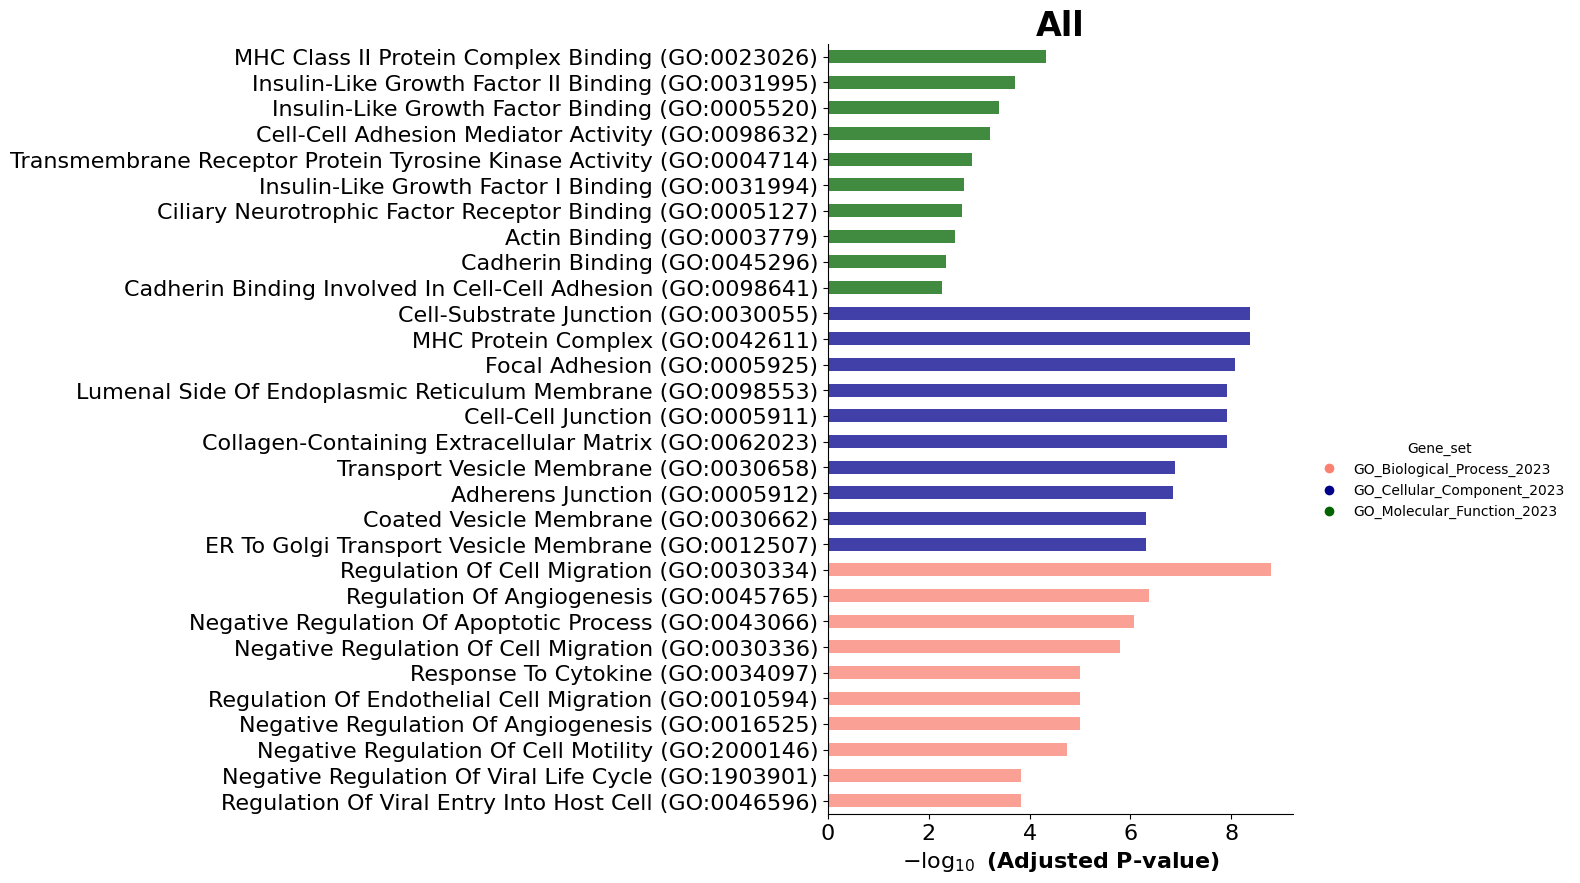

In [105]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023", 'GO_Cellular_Component_2023','GO_Molecular_Function_2023'],
                    outdir=None)
enr_GO.res2d.Term = enr_GO.res2d.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(6,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closed glyph list over 'GSUB': 18 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closing glyph list over 'glyf': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77,

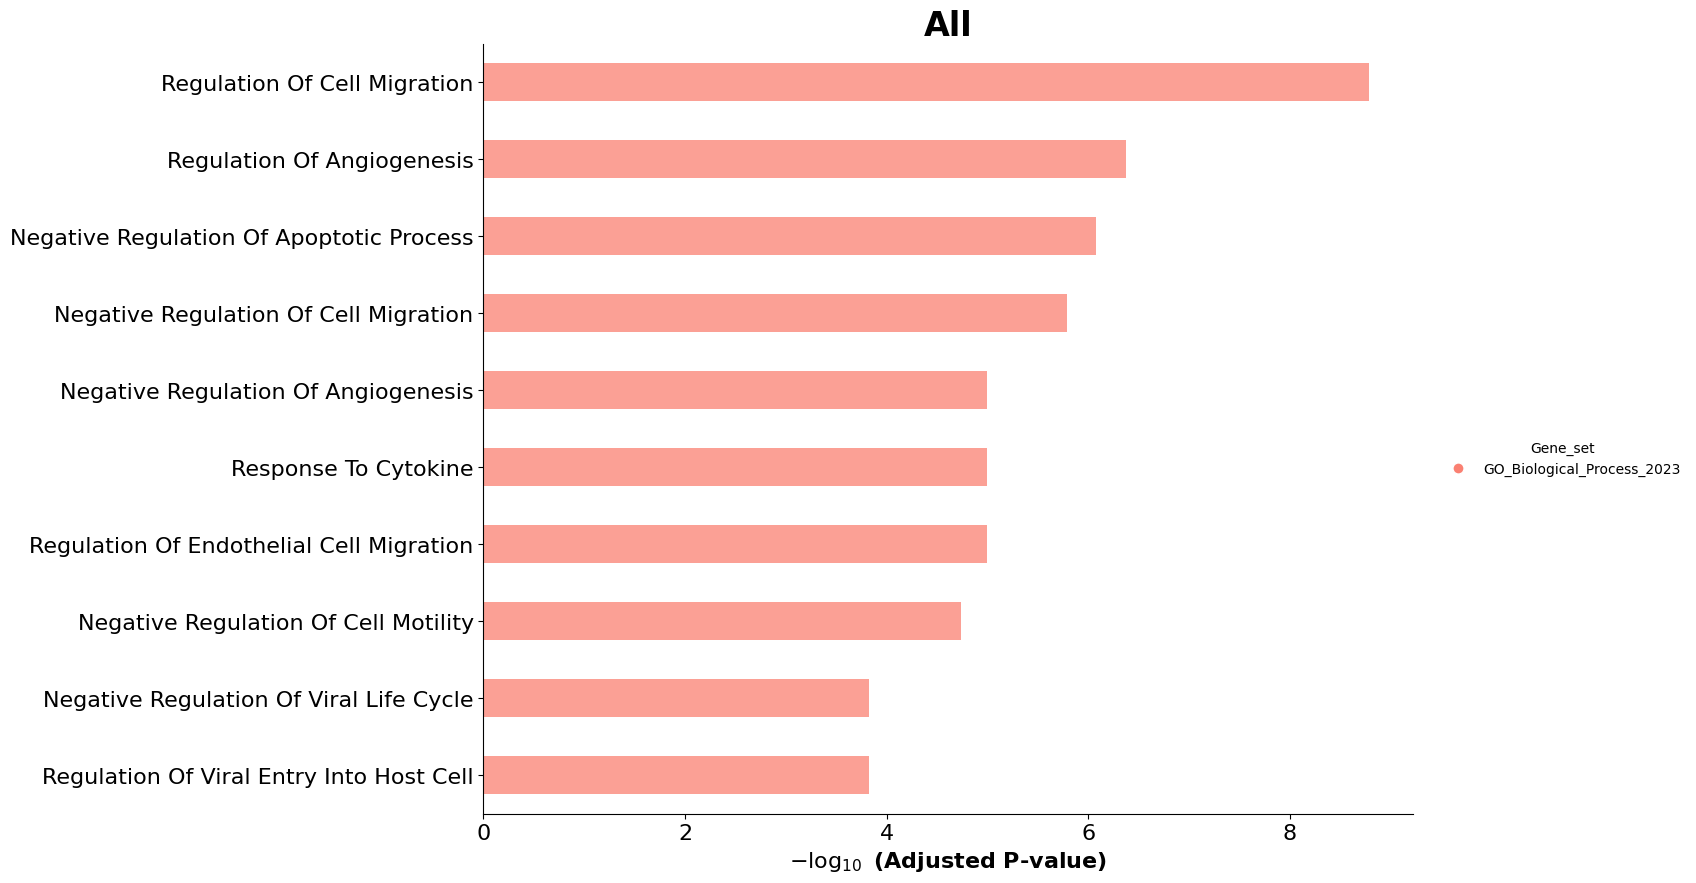

In [104]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023"],
                    outdir=None)
enr_GO.results.Term = enr_GO.results.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(12,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.savefig("figures/GOBP_vEC.pdf")
plt.show()

### FB


In [84]:
ct = 'Fibroblast'
adata_ct = adata[adata.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [78]:
ct = 'Fibroblast'
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [97]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [98]:
df_old

gene  logfoldchanges         pvals     pvals_adj group
5911       NES       -2.966721  2.725271e-05  2.319380e-04   old
5826      GPC5       -2.945033  2.346913e-03  1.396972e-02   old
5910      MCAM       -2.838992  2.737890e-05  2.320246e-04   old
5879     PDZD2       -2.794732  1.677329e-04  1.234390e-03   old
5935    CLSTN2       -2.786049  7.697959e-06  7.437642e-05   old
...        ...             ...           ...           ...   ...
4147  SERPINE2        2.197957  4.638162e-05  3.786255e-04   old
4128    IGFBP3        2.214644  1.068968e-09  1.303620e-08   old
4161     PTGIR        2.497588  2.328347e-03  1.394220e-02   old
4140     SPON2        2.594010  1.595966e-06  1.636888e-05   old
4132   EMILIN1        2.898615  3.851033e-08  4.452061e-07   old

[378 rows x 5 columns]

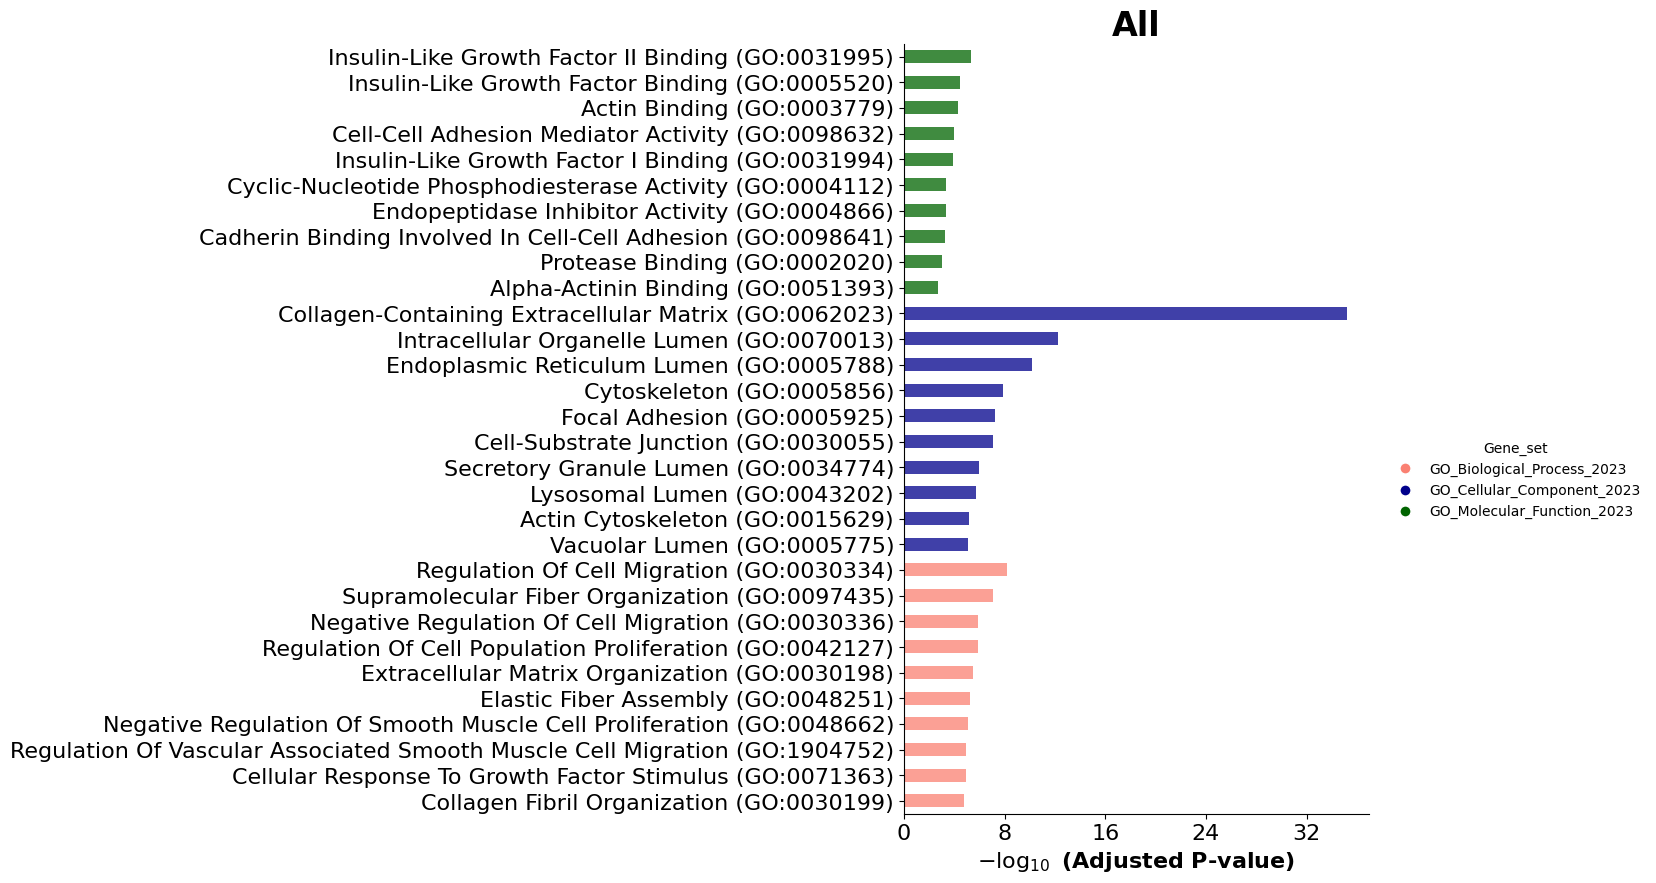

In [99]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023", 'GO_Cellular_Component_2023','GO_Molecular_Function_2023'],
                    outdir=None)
enr_GO.res2d.Term = enr_GO.res2d.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(6,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
name pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closed glyph list over 'GSUB': 18 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77, 79, 86, 87, 88, 89]
Closing glyph list over 'glyf': 18 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'P', 'a', 'd', 'e', 'hyphen', 'j', 'l', 'nonmarkingreturn', 'parenleft', 'parenright', 's', 'space', 't', 'u', 'v']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 36, 51, 68, 71, 72, 77,

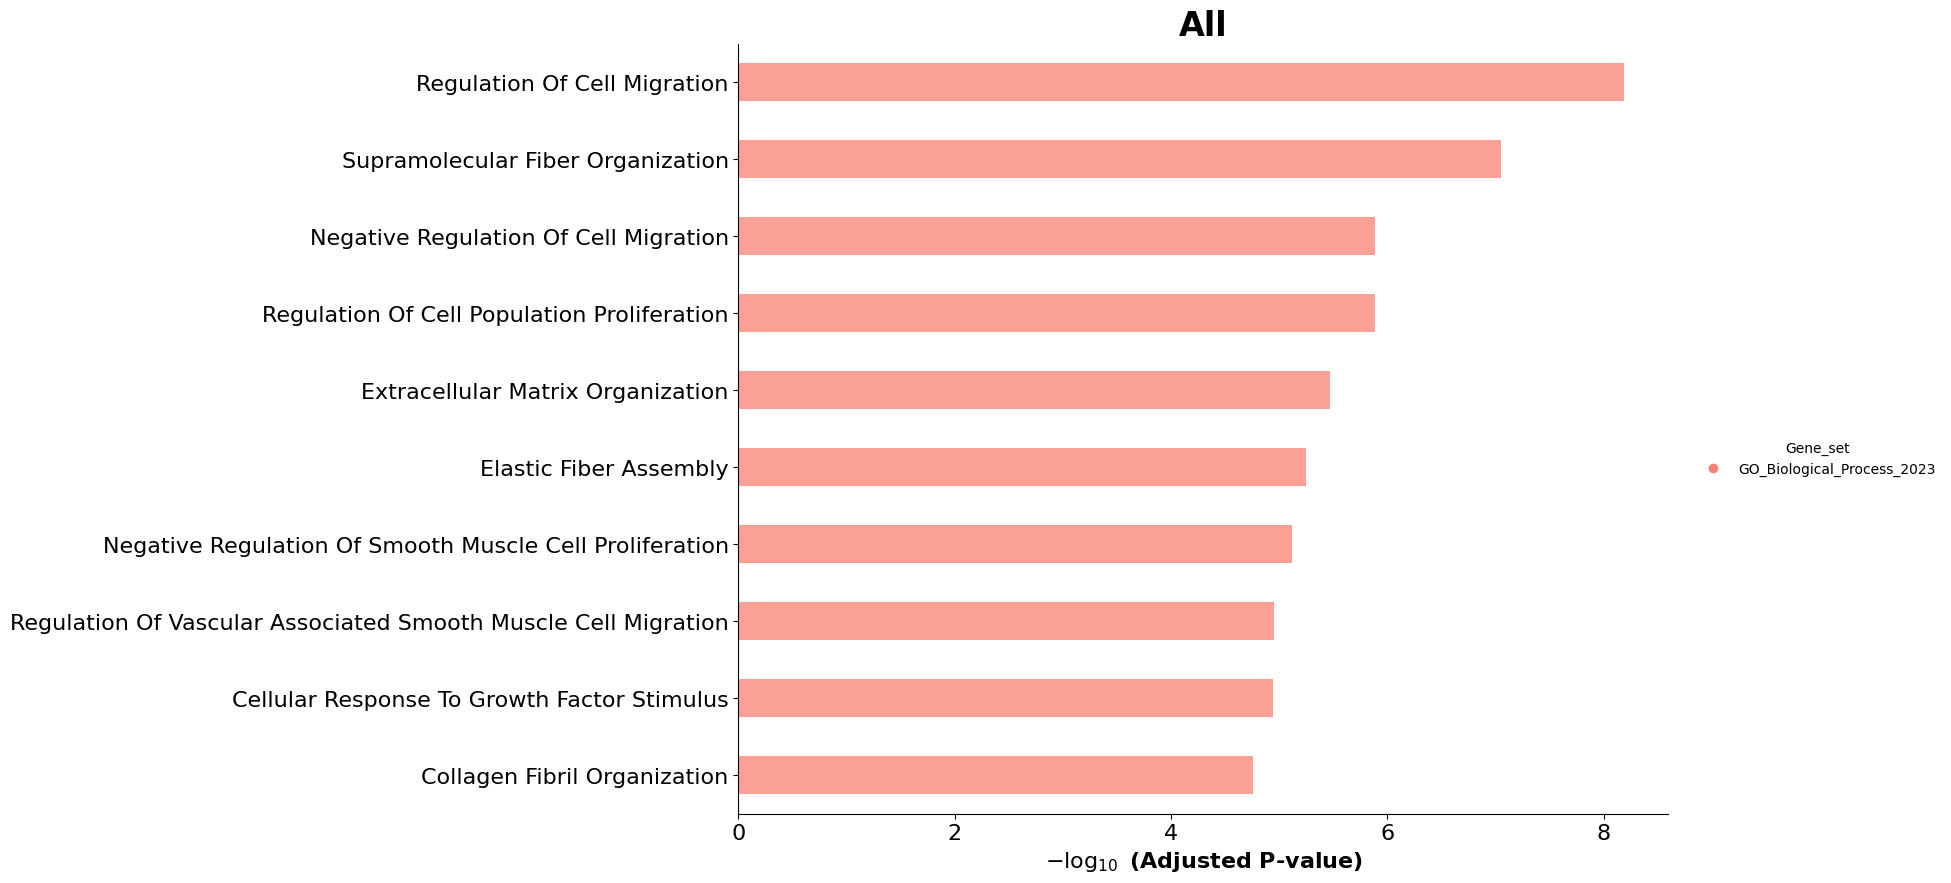

In [100]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023"],
                    outdir=None)
enr_GO.results.Term = enr_GO.results.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(12,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.savefig("figures/GOBP_FB.pdf")
plt.show()

### SMC


In [523]:
ct = 'Smooth muscle cell'
adata_ct = adata[adata.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [524]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [525]:
df_old

gene  logfoldchanges         pvals     pvals_adj group
5982   MT-ATP8      -26.327923  2.514516e-09  1.289496e-07   old
5979  MTRNR2L1      -26.192200  6.654653e-09  3.168883e-07   old
5938     HLA-A      -24.875330  5.888680e-04  9.201062e-03   old
5994    MT-ND5       -7.236333  2.199566e-11  1.999605e-09   old
5993   MT-ND4L       -7.095241  2.683587e-11  2.264699e-09   old
...        ...             ...           ...           ...   ...
4058    HIGD1B        0.977497  2.543162e-04  4.461688e-03   old
4042      TFPI        1.005853  3.002588e-05  6.672417e-04   old
4069     TPPP3        1.090374  9.179833e-04  1.320839e-02   old
4032   ARHGDIB        1.174483  2.570034e-06  7.342955e-05   old
4057     EDNRB        1.307530  2.336541e-04  4.135470e-03   old

[164 rows x 5 columns]

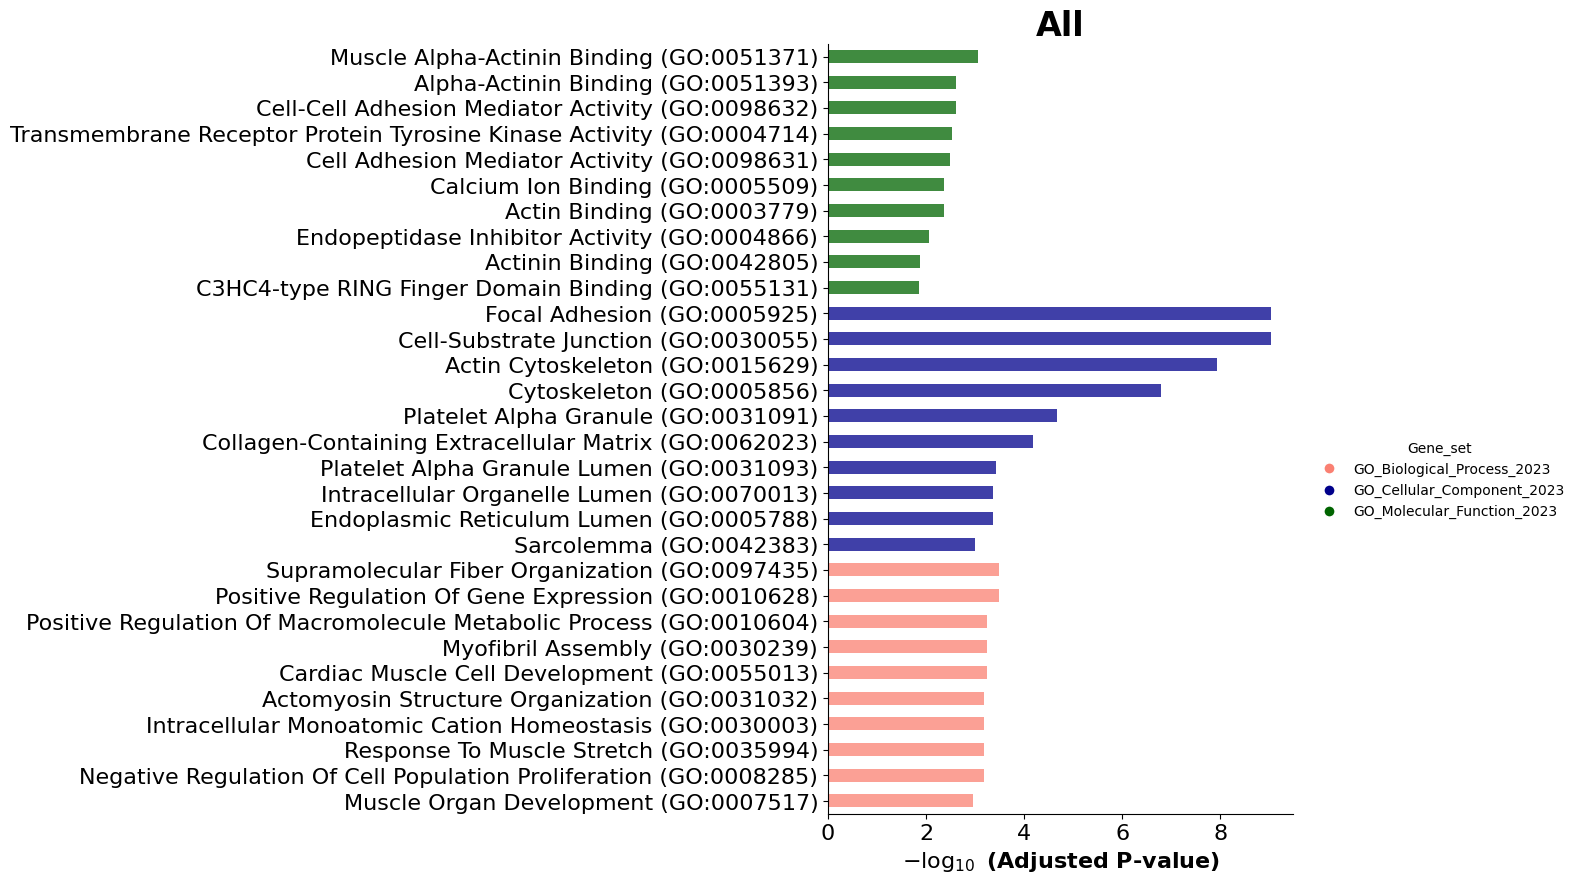

In [237]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023", 'GO_Cellular_Component_2023','GO_Molecular_Function_2023'],
                    outdir=None)
enr_GO.res2d.Term = enr_GO.res2d.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(6,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.show()

### MP


In [527]:
ct = 'Macrophage'
adata_ct = adata[adata.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_DEG/{ct}.csv", index_col=0)

In [528]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

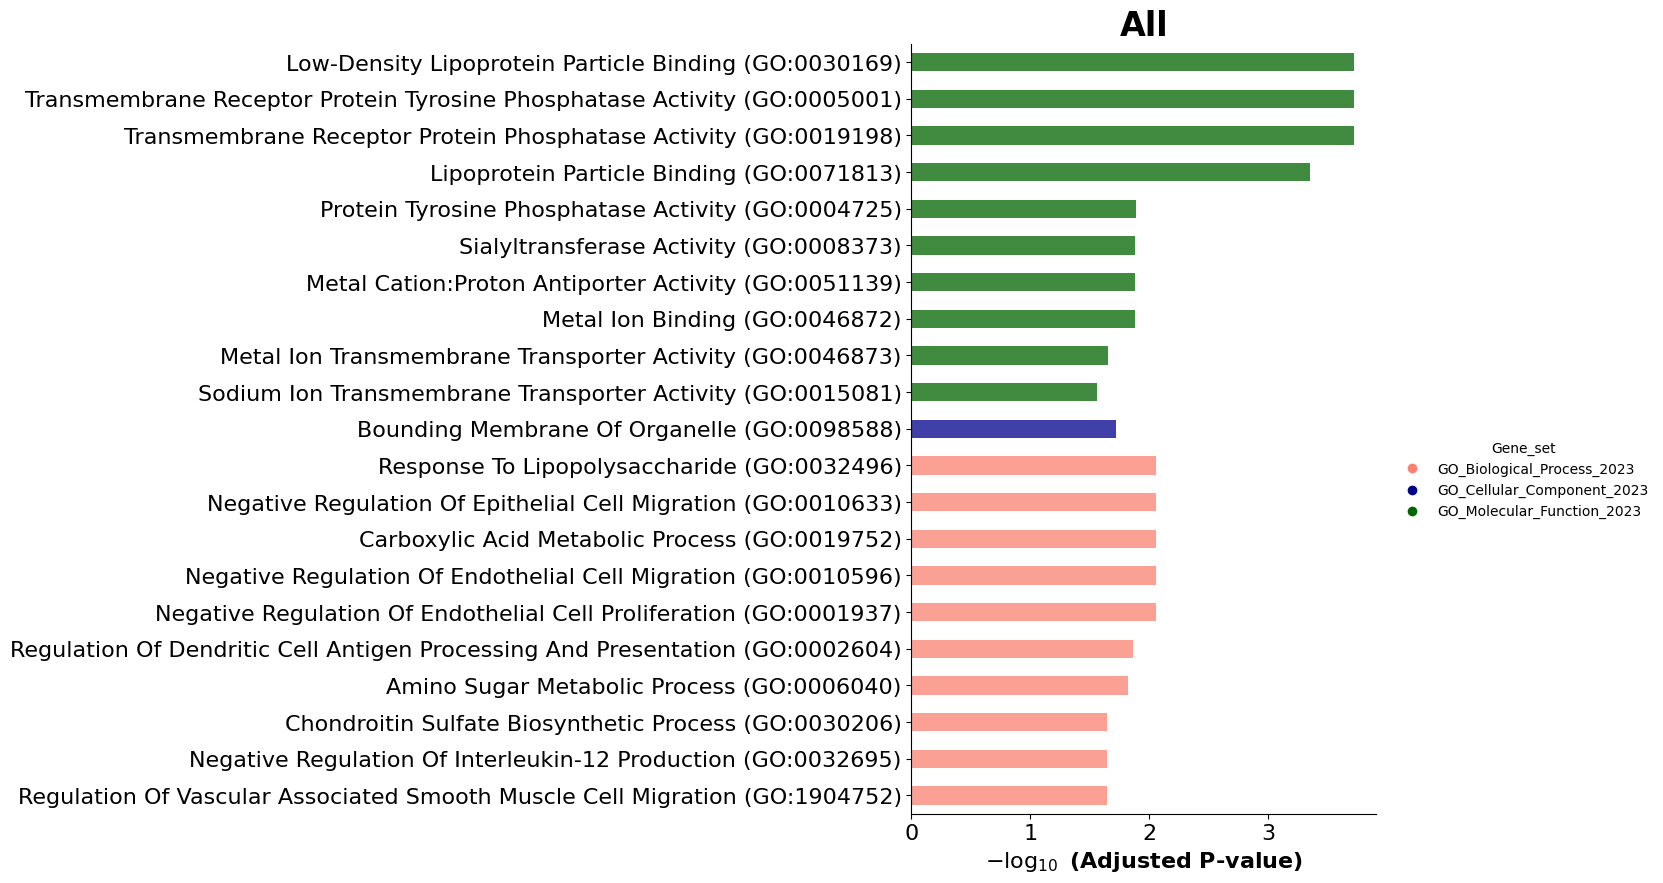

In [244]:
enr_GO = gp.enrichr(age_related_genes,
                    gene_sets=["GO_Biological_Process_2023", 'GO_Cellular_Component_2023','GO_Molecular_Function_2023'],
                    outdir=None)
enr_GO.res2d.Term = enr_GO.res2d.Term.str.split(" \(GO").str[0]
gp.barplot(enr_GO.results, figsize=(6,10),
           group="Gene_set",
           top_term=10,
           color = {'GO_Biological_Process_2023': 'salmon', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'darkgreen'},
           title="All")
plt.show()

In [297]:
adata.write_h5ad("/nfs/public/cell_gpt_data/dataHub/generated_cells/Heart_aging/merged.h5ad")

### CM

In [53]:
ct = "Cardiomyocyte cell"
adata_ct = adata_GSVA[adata_GSVA.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_GSVA/{ct}.csv", index_col=0)

In [56]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

df_old['GOBase'] = [x.split('_')[0] for x in df_old['gene']]
df_old[df_old.GOBase=="GOBP"].iloc[0:10]

gene  logfoldchanges  \
3964         GOBP_REGULATION_OF_LEUKOCYTE_PROLIFERATION       -5.764803   
5665  GOBP_DEVELOPMENT_OF_PRIMARY_SEXUAL_CHARACTERIS...       -5.244467   
3904                           GOBP_HOMEOSTATIC_PROCESS       -4.960440   
5444          GOBP_REGULATION_OF_NEURON_DIFFERENTIATION       -2.753385   
5490                                GOBP_AXON_EXTENSION       -2.247982   
4175               GOBP_RESPONSE_TO_INORGANIC_SUBSTANCE       -2.225569   
4507                             GOBP_INSULIN_SECRETION       -1.868357   
3956                             GOBP_T_CELL_ACTIVATION       -1.797864   
3820  GOBP_NEGATIVE_REGULATION_OF_EXTRINSIC_APOPTOTI...       -1.796281   
5387  GOBP_REGULATION_OF_PLASMA_LIPOPROTEIN_PARTICLE...       -1.667302   

         pvals  pvals_adj group GOBase  
3964  0.114904   0.784413   old   GOBP  
5665  0.063933   0.784413   old   GOBP  
3904  0.070812   0.784413   old   GOBP  
5444  0.324261   0.843406   old   GOBP  
5490  0.263499   0.810349   old   GOBP  
4175  0.239491   0.793714   old   GOBP  
4507  0.575246   0.934102   old   GOBP  
3956  0.110328   0.784413   old   GOBP  
3820  0.015226   0.784413   old   GOBP  
5387  0.389535   0.866238   old   GOBP

### vEC

In [50]:
ct = 'Vascular endothelial cell'
adata_ct = adata_GSVA[adata_GSVA.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_GSVA/{ct}.csv", index_col=0)

In [51]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [52]:
df_old['GOBase'] = [x.split('_')[0] for x in df_old['gene']]
df_old[df_old.GOBase=="GOBP"].iloc[0:10]

gene  logfoldchanges  \
5104                  GOBP_LEUKOCYTE_CELL_CELL_ADHESION       -4.501511   
5539               GOBP_NEUTRAL_LIPID_METABOLIC_PROCESS       -3.389893   
5659  GOBP_POSITIVE_REGULATION_OF_ESTABLISHMENT_OF_P...       -2.850605   
5286     GOBP_REGULATION_OF_RESPONSE_TO_BIOTIC_STIMULUS       -2.420120   
5573     GOBP_REGULATION_OF_NUCLEOCYTOPLASMIC_TRANSPORT       -2.182266   
4967      GOBP_REGULATION_OF_OSTEOCLAST_DIFFERENTIATION       -2.064079   
4180                      GOBP_DENDRITIC_CELL_MIGRATION       -2.042784   
3997        GOBP_PROTEIN_CONTAINING_COMPLEX_DISASSEMBLY       -1.933784   
5344     GOBP_NEGATIVE_REGULATION_OF_HYDROLASE_ACTIVITY       -1.775375   
4006      GOBP_REGULATION_OF_LIPID_BIOSYNTHETIC_PROCESS       -1.771273   

         pvals  pvals_adj group GOBase  
5104  0.455844   0.902230   old   GOBP  
5539  0.101688   0.738890   old   GOBP  
5659  0.029143   0.672966   old   GOBP  
5286  0.299226   0.870109   old   GOBP  
5573  0.079486   0.738890   old   GOBP  
4967  0.595775   0.938301   old   GOBP  
4180  0.494139   0.921321   old   GOBP  
3997  0.254258   0.842591   old   GOBP  
5344  0.244852   0.840555   old   GOBP  
4006  0.269833   0.856643   old   GOBP

### FB

In [47]:
ct = 'Fibroblast'
adata_ct = adata_GSVA[adata_GSVA.obs.cell_type==ct,:]
adata_ct.obs.Age_bin = pd.Categorical(adata_ct.obs.Age_bin, ["Teen", "Middle", "old"])
rank_genes_df_filtered = pd.read_csv(f"/nfs/public/chenyx/scMulan_experiment/Aging_generation_GSVA/{ct}.csv", index_col=0)

In [48]:
df_old = rank_genes_df_filtered[rank_genes_df_filtered.group=="old"]
df_old = df_old.sort_values('logfoldchanges')
age_related_genes = df_old.gene

In [49]:
df_old['GOBase'] = [x.split('_')[0] for x in df_old['gene']]
df_old[df_old.GOBase=="GOBP"].iloc[0:10]

gene  logfoldchanges  \
5264     GOBP_REGULATION_OF_RESPONSE_TO_BIOTIC_STIMULUS       -4.023399   
5283          GOBP_ACTIVATION_OF_INNATE_IMMUNE_RESPONSE       -3.626971   
5171           GOBP_OLEFINIC_COMPOUND_METABOLIC_PROCESS       -3.533153   
5693                       GOBP_RESPONSE_TO_CALCIUM_ION       -3.438275   
5679  GOBP_BIOLOGICAL_PROCESS_INVOLVED_IN_INTERACTIO...       -3.132947   
5179                      GOBP_REGULATION_OF_EXOCYTOSIS       -2.973385   
5151                               GOBP_CELL_ACTIVATION       -2.264434   
3945                      GOBP_RENAL_TUBULE_DEVELOPMENT       -2.125854   
4149               GOBP_REGULATION_OF_PROTEIN_SECRETION       -1.784869   
3932                      GOBP_PHAGOCYTOSIS_RECOGNITION       -1.689232   

         pvals  pvals_adj group GOBase  
5264  0.235439   0.609294   old   GOBP  
5283  0.220831   0.598500   old   GOBP  
5171  0.309541   0.649729   old   GOBP  
5693  0.018028   0.556281   old   GOBP  
5679  0.026470   0.556281   old   GOBP  
5179  0.303193   0.645960   old   GOBP  
5151  0.323629   0.655503   old   GOBP  
3945  0.098070   0.563449   old   GOBP  
4149  0.290194   0.642333   old   GOBP  
3932  0.093407   0.563449   old   GOBP

# 3. cell-cellcommunication

 see 04.Aging_Heart_Cell_cell_communication in R